In [1]:
from impedance import preprocessing
import pandas as pd
import os


data_path = os.path.join("wyniki", "21.txt")

data = pd.read_csv(data_path, sep="\t")


frequencies, Z = data.iloc[:,0], data.iloc[:,1] + 1j*data.iloc[:,2]

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [2]:
data

,f,Zre,Zim
0,0.7,71.1450,-8.68820
1,1.1,71.1450,-8.68820
2,1.7,63.0880,-9.85750
3,4.3,56.3680,-15.74500
4,7.1,43.0760,-19.65300
5,11.3,35.1140,-20.56900
6,28.1,18.2220,-17.46000
7,44.3,12.7070,-14.22700
8,70.9,9.3563,-12.09500
9,112.3,8.4831,-8.75810


In [3]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(CPE1,R1)'
initial_guess = [100, 1,1, 400]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [9]:
circuit.plot()

/home/kuba/Coding/cholerny-impedant/.venv/lib64/python3.13/site-packages/impedance/visualization.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Z_df = pd.concat([Z_df, df], ignore_index=True)


alt.HConcatChart(...)

In [4]:
circuit.fit(frequencies, Z)

In [5]:
circuit.parameters_

array([3.15168021e+00, 5.90702549e-04, 7.66803364e-01, 6.93656687e+01])

In [6]:
Z_fit = circuit.predict(frequencies)

In [7]:
Z_fit

array([68.63649848 -7.45940637j, 66.7153802 -10.05776206j,
       63.94669753-13.11615184j, 53.49782518-20.37859849j,
       44.93511295-23.15739013j, 35.95119001-23.79456261j,
       20.16743245-19.37218186j, 14.69160512-15.75234636j,
       10.7474361 -12.11572862j,  8.18297761 -9.07153477j,
        6.5044399  -6.65368547j,  5.40031568 -4.8042589j ,
        4.67139354 -3.43207796j,  4.18994922 -2.44192022j,
        3.86531713 -1.72882274j,  3.64513497 -1.22113065j,
        3.49443074 -0.8611835j ,  3.39026304 -0.60598928j])

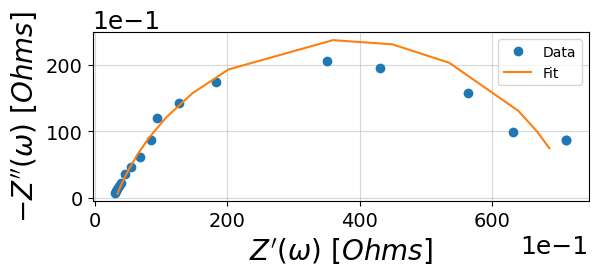

In [8]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()